Simple chatbot with streaming capability using Langgraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("groq:llama-3.3-70b-versatile")
llm.invoke("Hey bro !!")

/Users/maruthienugula/RAG_learnings/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="What's up! How's it going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 38, 'total_tokens': 48, 'completion_time': 0.022396108, 'completion_tokens_details': None, 'prompt_time': 0.001733984, 'prompt_tokens_details': None, 'queue_time': 0.048475585, 'total_time': 0.024130092}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2717-20fe-7260-811b-84ce358d2ef2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 38, 'output_tokens': 10, 'total_tokens': 48})

# we need nodes that act as checkpoints for memory saving

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

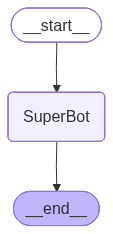

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,I am morty i like building things that doesn't work"},config)

{'messages': [HumanMessage(content="Hi,I am morty i like building things that doesn't work", additional_kwargs={}, response_metadata={}, id='818c634c-fc73-40fe-93d3-9d806e8f36f8'),
  AIMessage(content="Wubba lubba dub dub! Hi Morty! It sounds like you're a bit of a tinkerer, always trying to build new things, even if they don't quite work out as planned. That's totally okay, Morty! Sometimes the best way to learn is by experimenting and trying new things.\n\nSo, what kind of things do you like to build? Are you into gadgets, machines, or maybe something a bit more... unconventional? And don't worry if they don't work, we can always try to figure out what went wrong and maybe even come up with a new plan to make it work.\n\nBy the way, have you ever built anything with your grandpa, Rick? He's always coming up with crazy schemes and inventions, maybe you can learn a thing or two from him... or maybe not, since he can be a bit of a wild card!", additional_kwargs={}, response_metadata={'t

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

for chunk in graph_builder.stream({'messages':"I am into building softwares and robotics"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Wubba lubba dub dub! That's awesome, Morty! Building software and robotics is a great way to combine creativity, problem-solving, and innovation. I'm sure you've got a lot of great ideas for projects, even if they don't always work out as planned.\n\nSo, what kind of software projects are you into? Are you building games, simulations, or maybe something more practical like tools or apps? And on the robotics side, are you working with platforms like Arduino or Raspberry Pi, or maybe even building your own custom robots from scratch?\n\nI'm sure Rick would be proud of your interests, Morty. He's always tinkering with gadgets and machinery, and he's got a real knack for finding creative solutions to complex problems. Maybe you can even get him to help you with your projects... just be careful not to get too caught up in one of his crazy schemes!\n\nBy the way, have you ever tried to build a robot that can navigate through the multiverse? Or ma

In [10]:
for chunk in graph_builder.stream({'messages':"why are you doing this wubba lubba thing"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content="Hi,I am morty i like building things that doesn't work", additional_kwargs={}, response_metadata={}, id='818c634c-fc73-40fe-93d3-9d806e8f36f8'), AIMessage(content="Wubba lubba dub dub! Hi Morty! It sounds like you're a bit of a tinkerer, always trying to build new things, even if they don't quite work out as planned. That's totally okay, Morty! Sometimes the best way to learn is by experimenting and trying new things.\n\nSo, what kind of things do you like to build? Are you into gadgets, machines, or maybe something a bit more... unconventional? And don't worry if they don't work, we can always try to figure out what went wrong and maybe even come up with a new plan to make it work.\n\nBy the way, have you ever built anything with your grandpa, Rick? He's always coming up with crazy schemes and inventions, maybe you can learn a thing or two from him... or maybe not, since he can be a bit of a wild card!", additional_kwargs={}, response_metadata={'tok

In [11]:
for chunk in graph_builder.stream({'messages':"So that is the reason you are doing it"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="I was trying to pay homage to the show and create a fun, lighthearted atmosphere in our conversation. I understand that it might not be to everyone's taste, and I'm happy to adjust my approach to better suit your preferences.\n\nNow that we've got that cleared up, let's focus on your interests in software and robotics. What are some of the projects you've been working on, and what challenges have you faced in getting them to work as intended? I'm here to listen and offer any guidance or advice I can provide.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 694, 'total_tokens': 806, 'completion_time': 0.322792328, 'completion_tokens_details': None, 'prompt_time': 0.074226622, 'prompt_tokens_details': None, 'queue_time': 0.048071434, 'total_time': 0.39701895}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop'

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [12]:
config = {"configurable": {"thread_id": "1"}}

async for event in graph_builder.astream_events({"messages":["Tell me who i am "]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Tell me who i am ']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019c2724-0aab-7541-8055-45d9c56efe04', 'metadata': {'thread_id': '1'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content="Hi,I am morty i like building things that doesn't work", additional_kwargs={}, response_metadata={}, id='818c634c-fc73-40fe-93d3-9d806e8f36f8'), AIMessage(content="Wubba lubba dub dub! Hi Morty! It sounds like you're a bit of a tinkerer, always trying to build new things, even if they don't quite work out as planned. That's totally okay, Morty! Sometimes the best way to learn is by experimenting and trying new things.\n\nSo, what kind of things do you like to build? Are you into gadgets, machines, or maybe something a bit more... unconventional? And don't worry if they don't work, we can always try to figure out what went wrong and maybe even come up with a new plan to make it work.\n\nBy the